<a href="https://colab.research.google.com/github/rajendran-official/AI_ML_COURSE_ICT/blob/DISCRIMINATIVE-AND-GENERATIVE-MODEL/Descriminitive_and_generative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df_gen =pd.read_csv('/content/mobile_price.csv')
df_gen.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,mid
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,high
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,high
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,high
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,mid


In [28]:
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   float64
 1   blue           2000 non-null   float64
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   float64
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   float64
 6   int_memory     2000 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   float64
 9   n_cores        2000 non-null   float64
 10  pc             2000 non-null   float64
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   float64
 14  sc_h           2000 non-null   float64
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   float64
 17  three_g        2000 non-null   float64
 18  touch_sc

In [29]:
df_gen['price_range'].value_counts()

,count
price_range,
mid,500
high,500
very_high,500
low,500


In [30]:
X = df_gen.drop('price_range', axis=1)
y = df_gen['price_range']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )

In [32]:
#descriminitive model P(y/x)"Given phone features , directly proce range"
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy :", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy : 0.7175


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GENERATIVE MODEL p(x|y) and P(y),"Given a proce range,what kind of phone specs are expectes?"

In [33]:
from sklearn.naive_bayes  import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy :", accuracy_score(y_test, y_pred_nb))

Naive Bayes Accuracy : 0.7975


In [34]:
print("Discriminative (Logistic):", accuracy_score(y_test, y_pred_lr))
print("Generative (Naive Bayes):", accuracy_score(y_test, y_pred_nb))

Discriminative (Logistic): 0.7175
Generative (Naive Bayes): 0.7975


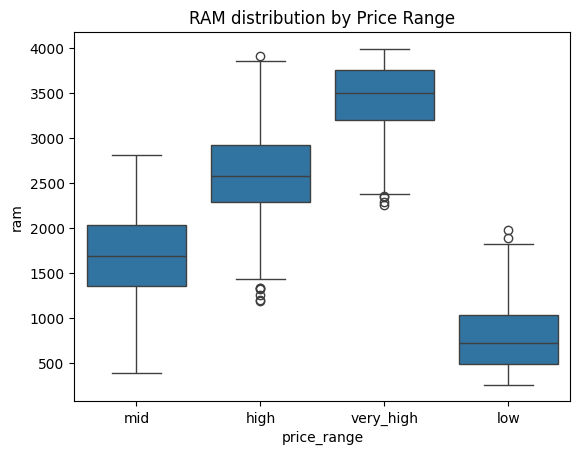

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="price_range",y="ram",data=df_gen)
plt.title("RAM distribution by Price Range")
plt.show()


Agglomerative Clustering

In [36]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [37]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
X=data.drop('CustomerID',axis=1)

In [39]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [40]:
data['Genre']=data['Genre'].map({'Male':1,'Female':0})

In [41]:
X=data.drop('CustomerID',axis=1)

In [42]:
mergings = linkage(X,method="centroid")

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Genre                   200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


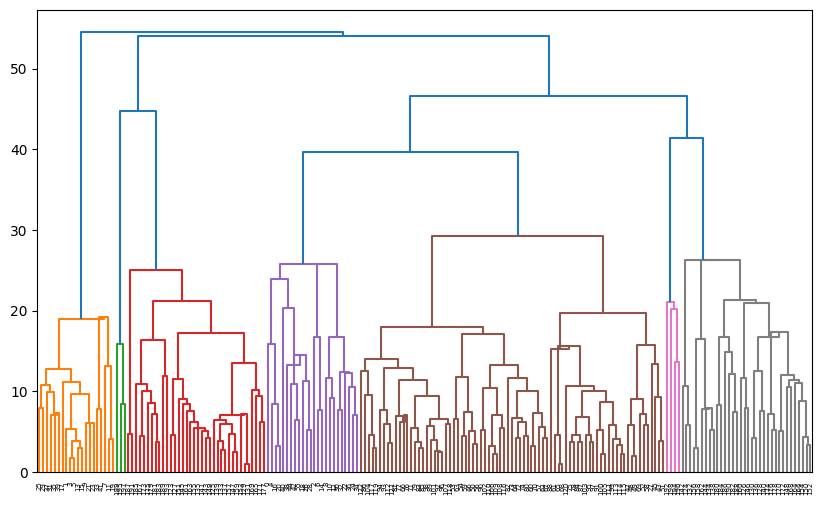

In [44]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [45]:
from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings,t=7,criterion='maxclust')

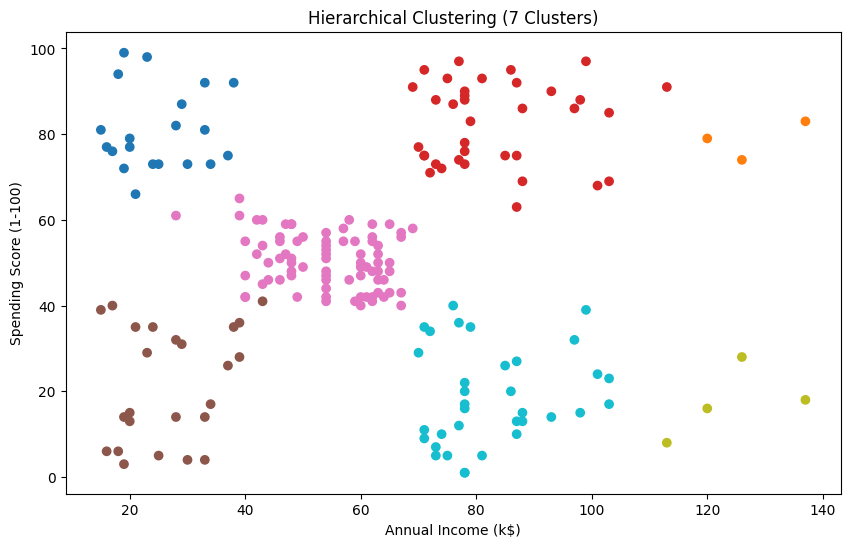

In [46]:
plt.figure(figsize=(10,6))
plt.scatter(
    X.iloc[:,2],
    X.iloc[:,3],
    c=labels,
    cmap='tab10'
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Hierarchical Clustering (7 Clusters)")
plt.show()